In [1]:
from sklearn.datasets import load_iris
import torch
from torch.utils.data import Dataset
from torch import nn
from tqdm.notebook import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading Data
iris = load_iris()
X = iris.data[:, [0, 3]] # sepal length and petal width
y = iris.target

In [3]:
# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [4]:
class IrisDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = torch.tensor(self.X[idx], dtype=torch.float32)
        y = torch.tensor(self.y[idx])

        return x, y

In [5]:
trainset = IrisDataset(X, y)

In [6]:
print("Total examples in the trainset:", len(trainset))

Total examples in the trainset: 150


In [7]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=50, shuffle=True)

print("Total no. batches in trainloader : {}".format(len(trainloader)))

Total no. batches in trainloader : 3


In [8]:
for X, y in trainloader:
    break


print("Shape of one batch images : {}".format(X.shape))
print("Shape of one batch bboxes : {}".format(y.shape))

Shape of one batch images : torch.Size([50, 2])
Shape of one batch bboxes : torch.Size([50])


In [9]:
DEVICE = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {DEVICE} device")

Using mps device


In [10]:
class MLPClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 3),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [11]:
model = MLPClassifier().to(DEVICE)
print(model)

MLPClassifier(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=3, bias=True)
    (5): Softmax(dim=1)
  )
)


In [12]:
def train_fn(model, dataloader, loss_fn, optimizer):
    total_loss = 0.0
    model.train()  # Dropout ON

    for data in tqdm(dataloader):
        X, y = data
        X, y = X.to(DEVICE), y.to(DEVICE)

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)

In [13]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

In [14]:
for i in range(30):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss = train_fn(model, trainloader, loss_fn, optimizer)

    print(f"Epoch: {i+1} train loss : {train_loss}")

Epoch 1
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1 train loss : 1.0016583601633708
Epoch 2
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 2 train loss : 0.8124203483263651
Epoch 3
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 3 train loss : 0.7472168405850729
Epoch 4
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 4 train loss : 0.693179726600647
Epoch 5
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 5 train loss : 0.6609273354212443
Epoch 6
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 6 train loss : 0.6361125707626343
Epoch 7
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 7 train loss : 0.6259602705637614
Epoch 8
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 8 train loss : 0.610512912273407
Epoch 9
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 9 train loss : 0.607459565003713
Epoch 10
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 10 train loss : 0.602181613445282
Epoch 11
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 11 train loss : 0.5974299311637878
Epoch 12
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 12 train loss : 0.5962157646814982
Epoch 13
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 13 train loss : 0.5937927563985189
Epoch 14
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 14 train loss : 0.5915680130322775
Epoch 15
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 15 train loss : 0.5905813972155253
Epoch 16
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 16 train loss : 0.5902796188990275
Epoch 17
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 17 train loss : 0.588937242825826
Epoch 18
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 18 train loss : 0.5885972579320272
Epoch 19
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 19 train loss : 0.5874810814857483
Epoch 20
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 20 train loss : 0.5872091253598531
Epoch 21
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 21 train loss : 0.5865355332692465
Epoch 22
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 22 train loss : 0.5863735874493917
Epoch 23
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 23 train loss : 0.5860741337140402
Epoch 24
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 24 train loss : 0.5852607091267904
Epoch 25
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 25 train loss : 0.585149864355723
Epoch 26
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 26 train loss : 0.584673285484314
Epoch 27
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 27 train loss : 0.5847615798314413
Epoch 28
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 28 train loss : 0.584238608678182
Epoch 29
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 29 train loss : 0.5841105580329895
Epoch 30
-------------------------------


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 30 train loss : 0.5834803581237793


In [15]:
model.eval()

y_pred = list()
with torch.no_grad():
    for data in trainset:
        X, _ = data
        X = X.unsqueeze(0).to(DEVICE)
        y = model(X)
        y_pred.append(torch.argmax(y, 1).item())

In [17]:
y = iris.target
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.98      0.96        50
           2       0.98      0.94      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



Text(95.72222222222221, 0.5, 'True')

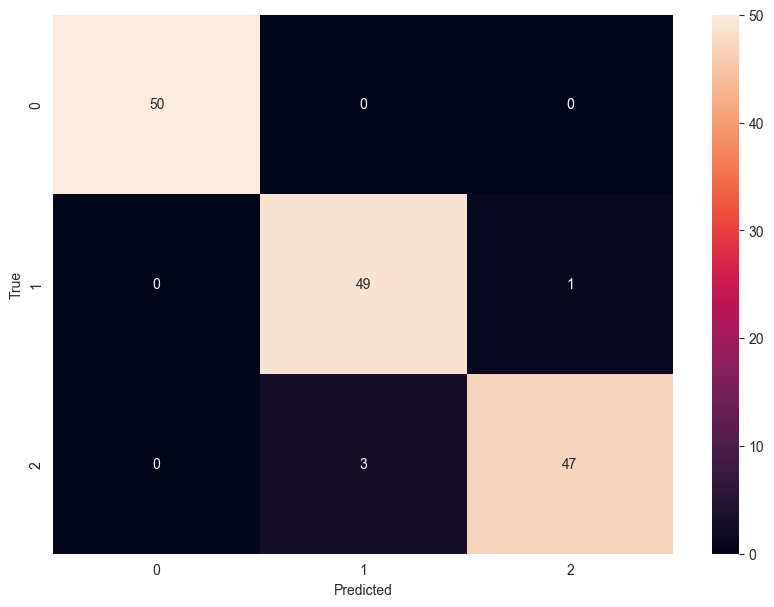

In [18]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')